# Self Organized Maps (SOMs)

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd

# SimpSOM, https://simpsom.readthedocs.io
import simpsom as sps
# from simpsom.plots import scatter_on_map

# Astropy
from astropy.table import Table

# CuPY
import cupy as cp

## Catalogs Matched Without Magnitudes in NWAY

Import the catalog

In [51]:
# RADIUS (3''), EMU (1''), DESY6GOLD (0.1''), VIKINGDR5 (0.1''), CATWISE2020 (0.2''), No MAGNITUDES
# For a false detection rate of <10% 
# p_i>=0.1 & match_flag==1 & p_any>0.83
matched_no_mags_path = '/data/mfonseca/cross_match/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_noMags/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag.fits'
matched_no_mags = Table.read(matched_no_mags_path)
matched_no_mags = matched_no_mags.to_pandas()

Filter using NWAY recomendations

In [52]:
# Here we filter the NWAY catalog to keep only the best objects

# From NWAY
# Filter the catalog based on the match_flag and p_i, p_any values
match_mask = (matched_no_mags['match_flag'] == 1) & (matched_no_mags['p_i'] >= 0.1) & (matched_no_mags['p_any'] >=0.83)
catalog_matches_noMags = matched_no_mags[match_mask]
print(f'Number of objects in the catalog {len(catalog_matches_noMags)}')

Number of objects in the catalog 11263


Select the objects that have matches in all the three surveys

In [63]:
# Here we select objects that have matches in all three surveys
full_match_mask = (catalog_matches_noMags['DESY6_coadd_object_id'] != -99) & (catalog_matches_noMags['VKG_sourceID'] != -99) & (catalog_matches_noMags['CAT_source_id'] != b'-99')
catalog_matches_noMags_full = catalog_matches_noMags[full_match_mask]
print(f'Number of objects in the catalog that have matches in all three surveys {len(catalog_matches_noMags_full)}')

Number of objects in the catalog that have matches in all three surveys 4207


## Catalogs Matched With Magnitudes in NWAY

Import the catalog

In [ ]:
# RADIUS (3''), EMU (1''), DESY6GOLD (0.1''), VIKINGDR5 (0.1''), CATWISE2020 (0.2''), MAGNITUDES
# For a false detection rate of <10% 
# p_i>=0.1 & match_flag==1 & p_any>0.05
matched_mags_path = '/data/mfonseca/cross_match/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_Mags/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_Mags.fits'
matched_mags = Table.read(matched_mags_path)
matched_mags = matched_mags.to_pandas()

In [64]:
matched_mags['VKG_sourceID'].describe()

count    1.043490e+05
mean     2.220811e+11
std      2.902080e+11
min     -9.900000e+01
25%     -9.900000e+01
50%     -9.900000e+01
75%      6.013071e+11
max      6.013296e+11
Name: VKG_sourceID, dtype: float64

Filter using NWAY recomendations

In [55]:
# Here we filter the NWAY catalog to keep only the best objects

# From NWAY
# Filter the catalog based on the match_flag and p_i, p_any values
match_mask = (matched_mags['match_flag'] == 1) & (matched_mags['p_i'] >= 0.1) & (matched_mags['p_any'] >=0.05)
catalog_matches_Mags = matched_mags[match_mask]
print(f'Number of objects in the catalog {len(catalog_matches_Mags)}')

Number of objects in the catalog 7747


In [62]:
# Here we select objects that have matches in all three surveys
full_match_mask = (catalog_matches_Mags['DESY6_coadd_object_id'] != -99) & (catalog_matches_Mags['VKG_sourceID'] != -99) & (catalog_matches_Mags['CAT_source_id'] != b'-99')
catalog_matches_Mags_full = catalog_matches_Mags[full_match_mask]
print(f'Number of objects in the catalog that have matches in all three surveys {len(catalog_matches_Mags_full)}')

Number of objects in the catalog that have matches in all three surveys 6211


In [8]:
# Filter the multiwavelenght catalog to keep only the columns needed
emu_columns = ['EMU_island_id']

# desdr2_mag = ['DES_mag_auto_g_dered', 'DES_mag_auto_r_dered', 'DES_mag_auto_i_dered', 'DES_mag_auto_z_dered']
# desdr2_colors = ['DES_g_r_dered', 'DES_r_i_dered', 'DES_i_z_dered']

desy6gold_mag = ['DESY6_mag_auto_g_extcorr', 'DESY6_mag_auto_r_extcorr', 'DESY6_mag_auto_i_extcorr', 'DESY6_mag_auto_z_extcorr', 'DESY6_mag_auto_y_extcorr']
desy6gold_colors = ['DESY6_g_r_extcorr', 'DESY6_r_i_extcorr', 'DESY6_i_z_extcorr', 'DESY6_z_y_extcorr']

viking_mag = ['VKG_zAperMag3_ab_extcorr', 'VKG_jAperMag3_ab_extcorr', 'VKG_yAperMag3_ab_extcorr', 'VKG_ksAperMag3_ab_extcorr', 'VKG_hAperMag3_ab_extcorr']
viking_colors = ['VKG_z_y_am3_extcorr', 'VKG_y_j_am3_extcorr', 'VKG_j_h_am3_extcorr', 'VKG_h_ks_am3_extcorr']

catwise_mag = ['CAT_W1mpro_ab', 'CAT_W2mpro_ab']
catwise_colors = ['CAT_w1_w2_ab']

colors_columns = desy6gold_colors + viking_colors +catwise_colors

catalog_matched = catalog_matched[colors_columns]

# Should be the same lenght as the filtered catalog
print(len(catalog_matched))

7190


In [ ]:
# Histograms of each columns

# for col in catalog_filtered_magnitude.columns:
#     plt.figure(figsize=(10, 5))
#     plt.hist(catalog_filtered_magnitude[col], bins=100, color='blue', alpha=0.7)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.grid()
#     plt.show()

## Define the Topology

Define the topology of the SOM, follow indications from "Self-Organizing Maps and Their Applications to Data Analysis" R. Ponmalai, C. Kamath

In [43]:
# SOM topology (lattice size)

# Number of sources in our dataframe
inputdata_size = len(catalog_matched)

# From Kohonen, the optimal ratio of height to width of the lattice
# is equal to the ratio of the two largest eigenvalue of the autocorrelation matrix
cov_std = catalog_matched.cov()
eigen_values = np.linalg.eigvals(cov_std.values)
eigen_values_sorted = np.sort(eigen_values)[::-1]
ratio_eigenvalues = eigen_values_sorted[0] / eigen_values_sorted[1]

# From Kohonen, the number of nodes if 5*sqrt(n), where n is the number of data points
som_dim = int(np.sqrt(inputdata_size) * 5)

# The number of nodes in the x and y direction
som_x = int(np.sqrt(som_dim * ratio_eigenvalues))
som_y = int(som_x / ratio_eigenvalues)

#=================================================================

# Resize the SOM map by applying a scaling factor that maintains the aspect ratio

scaling_factor = 2  # Change this factor to resize the map

# Apply scaling to the x dimension, and calculate y dimension based on ratio
som_x_resized = int(som_x * scaling_factor)
som_y_resized = int(som_x_resized / ratio_eigenvalues)  # Keep the same ratio of eigenvalues

#=================================================================

# Print the results
print('Dimension of the SOM: ', som_dim)
print('Square SOM map size ', np.round(np.sqrt(som_dim)))
print('Ratio of the two largest eigenvalues: ', int(ratio_eigenvalues))
print('SOM map size using eigenvalues: ', som_x, 'x', som_y)

print('Resized SOM map size using eigenvalues: ', som_x_resized, 'x', som_y_resized)

Dimension of the SOM:  423
Square SOM map size  21.0
Ratio of the two largest eigenvalues:  21
SOM map size using eigenvalues:  96 x 4
Resized SOM map size using eigenvalues:  192 x 8


/tmp/ipykernel_63881/2015779319.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  som_x = int(np.sqrt(som_dim * ratio_eigenvalues))
/tmp/ipykernel_63881/2015779319.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  som_y = int(som_x / ratio_eigenvalues)
/tmp/ipykernel_63881/2015779319.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  som_y_resized = int(som_x_resized / ratio_eigenvalues)  # Keep the same ratio of eigenvalues
/tmp/ipykernel_63881/2015779319.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  print('Ratio of the two largest eigenvalues: ', int(ratio_eigenvalues))


In [10]:
# Definine the subset of the catalog to use
data_fraction2use = 1
data = catalog_matched.sample(frac=data_fraction2use)

# Normalize the data
data.to_numpy()
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values 

## Quantization Error (QE) and Topographic Error (TE)

In [ ]:
# THIS FUNCTION WORKS

# Quantization Error (QE)
# Average distance of a data point to the nearest lattice node
# Measures how well the mapping fits the distribution of the data

def som_quantization_error(data, trained_som):
    '''
    Calculates the quantization error of a trained SOM.ipynb

    Args:
        data: NumPy array of input data.
        trainded_som: trained SimpSOM SOMNet object

    Returns:
        quantization error (float)
    '''
    # Convert to clean NumPy array with uniform dtype first
    data_np = np.asarray(data, dtype=np.float64)

    # Convert NumPy array to CuPy array for GPU processing
    data_cp = cp.array(data_np)

    # Find all BMU indices
    bmu_indices = trained_som.find_bmu_ix(data_cp)

    # Get the weights of the BMUs
    bmu_weights = cp.array([trained_som.nodes_list[int(bmu_idx)].weights for bmu_idx in bmu_indices])

    # Vectorized distance calculation
    distances = cp.linalg.norm(bmu_weights - data_cp, axis=1)
    total_distance = cp.sum(distances)

    quantization_error = float(total_distance / len(data))
    return quantization_error


In [ ]:
# THIS FUNCTION WORKS

# Topographic Error (TE)
# Proportion of data points whose BMU and second BMU are NOT neighbors
# Measures how well the shape of the data is preserved in the output space

def som_topographic_error(data, trained_som):
    """
    Computes topographic error ET for a SOM with hex topology using GPU (CuPy).
    
    Args:
        data:    The input data used to train the SOM (NumPy array).
        trained_som: A trained SOMNet object from the simpsom library.

    Returns:
        Topographic error (float between 0 and 1).
        Proportion of data points whose BMU and second BMU are NOT neighbors
    """
    # Convert to clean NumPy array with uniform dtype first
    data_np = np.asarray(data, dtype=np.float64)

    # Convert data to CuPy arrays
    data_cp = cp.array(data)

    # Get all the nodes' weights from the trained SOM (GPU-enabled)
    weights_cp = cp.array([node.weights for node in trained_som.nodes_list])

    # Initialize total error
    total_error = 0

    # Find all BMU indices
    bmu_indices = trained_som.find_bmu_ix(data_cp)

    # Find all the second BMU indices
    som_dist = sps.distances.Distance(xp=np) # Initialize the distance object, as required by the documentation
    distances = som_dist.pairdist(data_cp, weights_cp, metric='euclidean')

    sorted_indices = cp.argsort(distances, axis=1)
    sbmu_indices = sorted_indices[:, 1]


    # Get the positions of the BMU and second BMU in the grid
    bmu_positions = cp.array([trained_som.nodes_list[int(bmu_idx)].pos for bmu_idx in bmu_indices])
    sbmu_positions = cp.array([trained_som.nodes_list[int(sbmu_idx)].pos for sbmu_idx in sbmu_indices])


    bmu_row, bmu_col = bmu_positions[:, 0], bmu_positions[:, 1]
    sbmu_row, sbmu_col = sbmu_positions[:, 0], sbmu_positions[:, 1]


    # Check if BMU and sBMU are neighbors
    row_neighbors = cp.abs(bmu_row - sbmu_row)
    col_neighbors = cp.abs(bmu_col - sbmu_col)

    not_neighbors = (row_neighbors > 1) | (col_neighbors > 1)

    number_not_neighbors = cp.sum(not_neighbors)

    # Compute the topographic error
    topographic_error = number_not_neighbors / data_cp.shape[0]

    return float(topographic_error)

# Running the SOM

In [11]:
# Does not work correcly because the learning rate is not updated in each training epoch

def track_som_errors(data, epochs, net_height=20, net_width=20):
    som_net = sps.SOMNet(
        net_height=net_height,
        net_width=net_width,
        data=data,
        topology='hexagonal',
        init='PCA',
        metric='euclidean',
        neighborhood_fun='gaussian',
        PBC=True,
        GPU=True,
        random_seed=42,
        output_path="./"
    )

    quantization_errors = []
    topographic_errors = []

    for epoch in range(epochs):

        som_net.train(
            train_algo='batch',
            epochs=1,
            start_learning_rate = 0.1,
            early_stop=None,
            batch_size=-1
        )

        quant_error = som_quantization_error(data, som_net)
        topo_error = som_topographic_error(data, som_net)

        quantization_errors.append(quant_error)
        topographic_errors.append(topo_error)

        print(f"Epoch {epoch+1}/{epochs} | QE: {quant_error:.4f} | TE: {topo_error:.4f}")

    return quantization_errors, topographic_errors, som_net

In [44]:
# Define the SOM
som = sps.SOMNet(
    som_y_resized,
    som_x_resized,
    data,
    load_file = None,
    metric= 'euclidean', # 'euclidian' or 'cosine' or 'manhattan'
    # metrick_kwds={},
    init = 'random' , # 'random' or 'pca'
    PBC = True,
    GPU = True,
    random_seed = 69,
    topology='hexagonal', # 'square' or 'hexagonal'
    debug= True
)

som.train(
    train_algo = 'batch', 
    epochs = 200,
    # start_learning_rate = 0.01 , # Used only for online training
    early_stop = None ,
    early_stop_patience = 5 ,
    early_stop_tolerance = 0.01 ,
    batch_size = -1
)

2025-04-27 13:50:54.868 | INFO     | simpsom.network:__init__:109 - Periodic Boundary Conditions active.
2025-04-27 13:50:54.872 | INFO     | simpsom.network:__init__:118 - Hexagonal topology.
2025-04-27 13:50:54.872 | INFO     | simpsom.network:_set_weights:194 - The weights will be initialized randomly.
2025-04-27 13:50:55.212 | INFO     | simpsom.network:train:419 - The map will be trained with the batch algorithm.
2025-04-27 13:50:55.215 | DEBUG    | simpsom.network:train:542 - Training SOM... 0.00%
2025-04-27 13:50:57.548 | DEBUG    | simpsom.network:train:542 - Training SOM... 5.00%
2025-04-27 13:50:59.841 | DEBUG    | simpsom.network:train:542 - Training SOM... 10.00%
2025-04-27 13:51:02.137 | DEBUG    | simpsom.network:train:542 - Training SOM... 15.00%
2025-04-27 13:51:04.443 | DEBUG    | simpsom.network:train:542 - Training SOM... 20.00%
2025-04-27 13:51:06.738 | DEBUG    | simpsom.network:train:542 - Training SOM... 25.00%
2025-04-27 13:51:09.029 | DEBUG    | simpsom.network

In [45]:
som.save_map('/data/mfonseca/soms/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_Mags.npy')

2025-04-27 13:51:44.178 | INFO     | simpsom.network:save_map:305 - Map shape and weights will be saved to:
/data/mfonseca/soms/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_Mags.npy


## U-Matrix

2025-04-27 13:51:47.139 | INFO     | simpsom.network:get_nodes_difference:643 - Weights difference among neighboring nodes calculated.


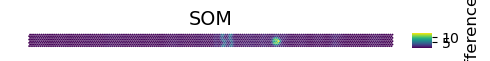

2025-04-27 13:51:47.667 | INFO     | simpsom.network:plot_map_by_difference:815 - Node difference map will be saved to:
././som_difference.png


In [46]:
som.plot_map_by_difference(show=True, print_out=True)

## Plot Original Data points

## Plot Quantization Error and Topographic Error

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(net.quantization_error, label='Quantization Error', color='blue')
plt.plot(net.topographic_error, label='Topographic Error', color='orange')
plt.title('SOM Training Errors')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

NameError: name 'net' is not defined

<Figure size 1000x500 with 0 Axes>

## Component Planes

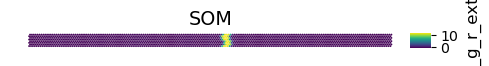

2025-04-27 13:51:57.283 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_0.png


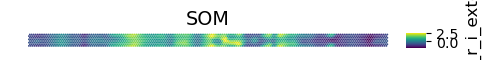

2025-04-27 13:51:57.820 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_1.png


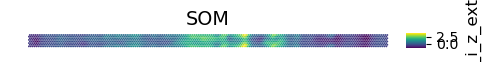

2025-04-27 13:51:58.362 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_2.png


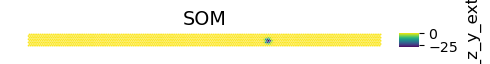

2025-04-27 13:51:58.902 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_3.png


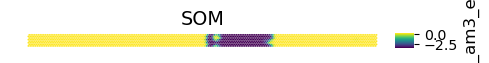

2025-04-27 13:51:59.736 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_4.png


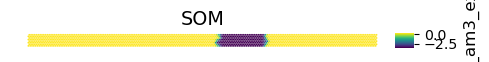

2025-04-27 13:52:00.249 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_5.png


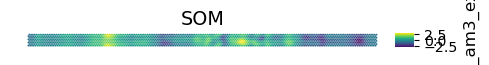

2025-04-27 13:52:00.776 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_6.png


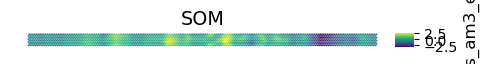

2025-04-27 13:52:01.396 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_7.png


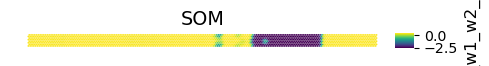

2025-04-27 13:52:01.919 | INFO     | simpsom.network:plot_map_by_feature:777 - Feature map will be saved to:
././som_feature_8.png


In [48]:
for i in range(len(catalog_matched.columns)):
    som.plot_map_by_feature(
        feature_ix= i,
        show=True,
        print_out=True,
        cbar_label=catalog_matched.columns[i],
    )

# MiniSom

### Example

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values


# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=4, linewidths=10, color='k', label='centroid')
plt.legend(loc='best')

### With our galaxy values

In [ ]:
galaxy_names = catalog_df['EMU_island_name'].str.decode('utf-8').str.strip()

# Normalize the data
data = (catalog_df_filtered_matches_magnitude - np.mean(catalog_df_filtered_matches_magnitude, axis=0)) / np.std(catalog_df_filtered_matches_magnitude, axis=0)
data = data.values

In [ ]:
som_shape = (10, 10)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.1,
              neighborhood_function='gaussian', random_seed=0)

som.train_batch(data, 100000, verbose=True)

In [ ]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plt.xlim(-.5,1)
# plt.ylim(-1,1)
